<a href="https://colab.research.google.com/github/RafsanJany-44/Machine-School/blob/main/KNN_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librery

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/RafsanJany-44/Machine-School/main/datasets/REM_NREM_O2.csv'

dataset = pd.read_csv(data)


#Spliting

In [2]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


#Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model (KNN)

Normal Model

In [4]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors=8)
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)

**Tunning**<br>Chosing Best n_neighbors for model

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=20
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))

1/20 round completed......................... Accurecy: 0.840180940072104
2/20 round completed......................... Accurecy: 0.8522549486429495
3/20 round completed......................... Accurecy: 0.8555540439425889
4/20 round completed......................... Accurecy: 0.8588871505339772
5/20 round completed......................... Accurecy: 0.860689748996667
6/20 round completed......................... Accurecy: 0.8603156247874294
7/20 round completed......................... Accurecy: 0.8613359635398953
8/20 round completed......................... Accurecy: 0.859193252159717
9/20 round completed......................... Accurecy: 0.860689748996667
10/20 round completed......................... Accurecy: 0.8595333650772057
11/20 round completed......................... Accurecy: 0.8607917828719135
12/20 round completed......................... Accurecy: 0.8609618393306577
13/20 round completed......................... Accurecy: 0.8610298619141555
14/20 round completed....

In [9]:
print("The best n_neighbors:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)#min(scores_list)

The best n_neighbors:
7


Graph

In [22]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    k_range = k_range,
    scores_list = scores_list
))
fig = px.line(df, x="k_range", y="scores_list", title="Unsorted Input")
fig.update_traces(textposition="bottom right")
fig.show()

Text(0, 0.5, 'Testing Accuracy')

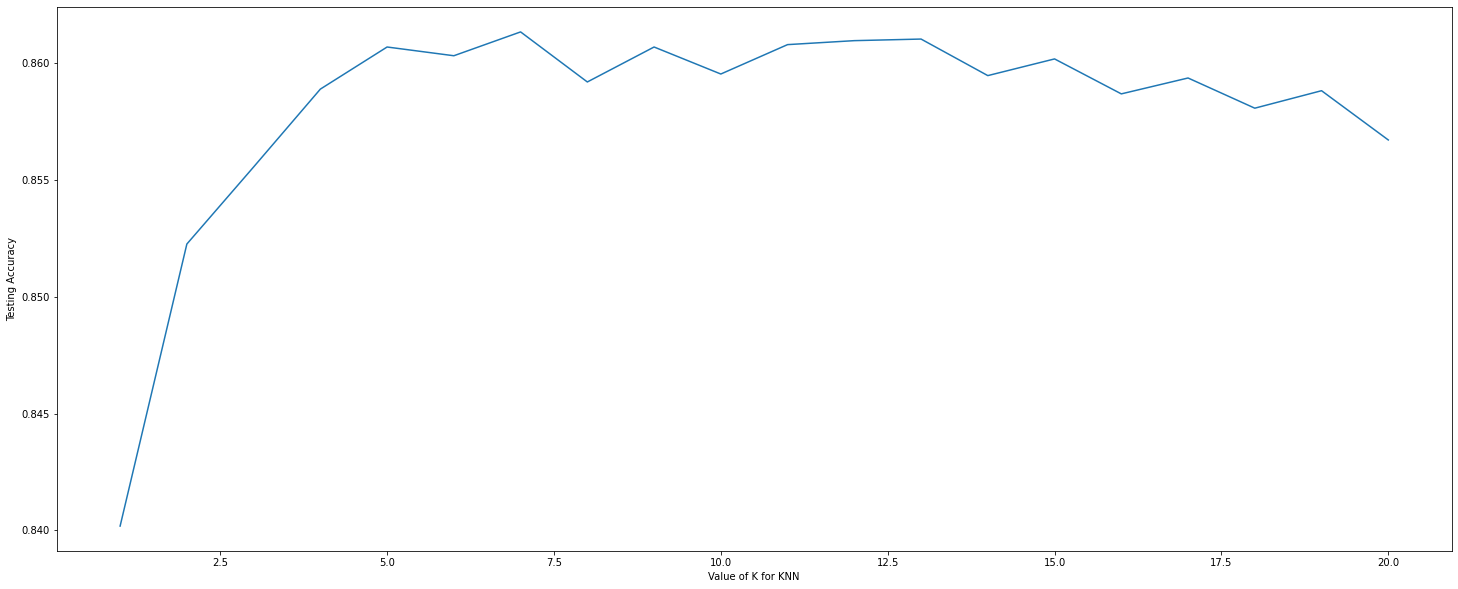

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel ('Testing Accuracy')

In [10]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors=best)
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)

#Small Details

In [11]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[22597  1333]
 [ 2744  2728]]
              precision    recall  f1-score   support

        NREM       0.89      0.94      0.92     23930
         REM       0.67      0.50      0.57      5472

    accuracy                           0.86     29402
   macro avg       0.78      0.72      0.74     29402
weighted avg       0.85      0.86      0.85     29402

Accurecy:  0.8613359635398953


#Confusion Matrix

Text(114.0, 0.5, 'Truth')

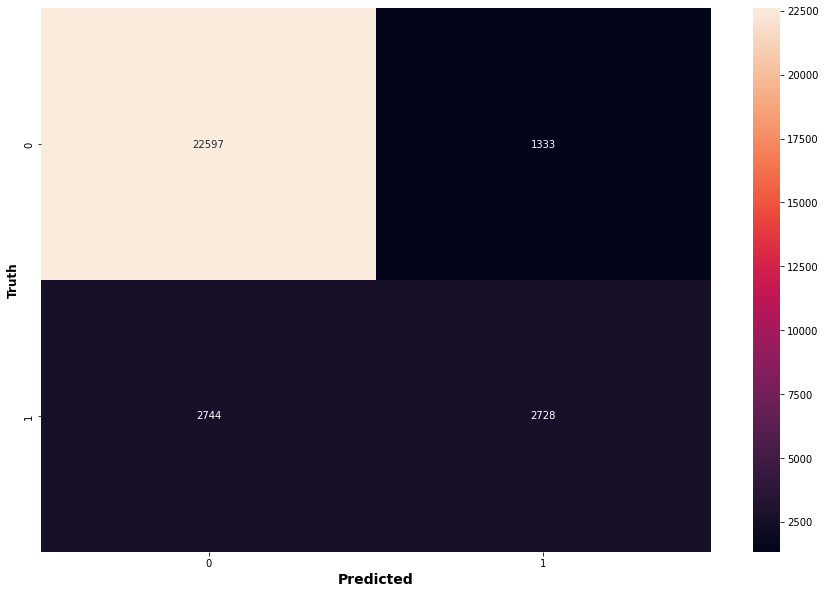

In [12]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted',fontsize=14.0, fontweight='bold')
plt.ylabel('Truth',fontsize=12.0, fontweight='bold')

#All Details

In [13]:
def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])
        
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        
        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]
        
        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

confusion_details(y_test,y_pred)

Total labels: 2 -> ['NREM', 'REM']
       NREM   REM
NREM  22597  1333
REM    2744  2728

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

#-- Local measures --#
True Positives(TP): {'NREM': 22597, 'REM': 2728}
False Positives(FP): {'NREM': 2744, 'REM': 1333}
True Negatives(TN): {'NREM': 2728, 'REM': 22597}
False Negatives(FN): {'NREM': 1333, 'REM': 2744}
----------------------------
Precision: {'NREM': 0.8917169803875143, 'REM': 0.6717557251908397}
Recall/Sensitivity: {'NREM': 0.9442958629335562, 'REM': 0.49853801169590645}
Specificity: {'NREM': 0.49853801169590645, 'REM': 0.9442958629335562}
F1-Score: {'NREM': 0.9172535568590042, 'REM': 0.5723277037658661}
Accuracy: {'NREM': 0.8471545325035615, 'REM': 0.4008817046289493}

----------------------------------------------------------------------------------------
-----------------------------------------------